In [1]:
import numpy as np
import scipy

Найти частное решение дифференциального уравнения методом Эйлера:
$$ y'+2y=x^2 $$
$$ y(0) = 1 $$
Искать на отрезке $ 0 < x < 1 $ с шагом $ h = 0.1 $.

#### Решение:

Метод Эйлера:
$$ y_i = y_{i-1} + (x_i-x_{i-1}) f(x_{i-1}, y_{i-1}) $$
В нашем случае:
$$ f(x, y) = x^2 - 2y$$

In [2]:
def accsolut(x):
    return 0.75 * np.exp(-2*x) + 0.5 * x**2 - 0.5 * x + 0.25

In [3]:
def foo(x, y):
    return x**2 - 2*y

In [4]:
def step(h, foo, x, y): #Эйлер
    return y + h * foo(x, y)

In [5]:
def step2(h, foo, x, y): #Эйлер с пересчетом
    k1 = foo(x, y)
    k2 = foo(x + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

In [6]:
def step3(h, foo, x, y): #Рунге-Кутта 4-го порядка
    k1 = foo(x, y)
    k2 = foo(x + 0.5 * h, y + 0.5 * h * k1)
    k3 = foo(x + 0.5 * h, y + 0.5 * h * k2)
    k4 = foo(x + h, y + h * k3)
    return y + 1/6. * h * (k1 + 2 * k2 + 2 * k3 + k4)

In [7]:
h = 0.1
x0 = 0
y0 = 1
xn = 1
N = int(xn/h)
print(N)

10


In [8]:
x = np.linspace(0, 1, N + 1)
y = np.zeros((N + 1, 3))
x[0] = x0
y[0, :] = [y0, y0, y0]
for i in range(N):
    y[i+1][0] = step(h, foo, x[i], y[i][0])
    y[i+1][1] = step2(h, foo, x[i], y[i][1])
    y[i+1][2] = step3(h, foo, x[i], y[i][2])

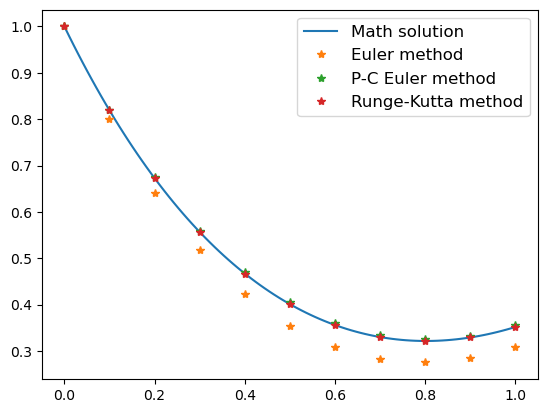

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 1, 10*N), accsolut(np.linspace(0, 1, 10*N)))
plt.plot(x, y[:, 0], '*')
plt.plot(x, y[:, 1], '*')
plt.plot(x, y[:, 2], '*')
plt.legend(["Math solution", "Euler method", "P-C Euler method", "Runge-Kutta method"], fontsize =12)
plt.show()